# Import data

The import code in this section is specific to the CSV automatically generated for each collective dialouge on remesh. To use data from other sources, import code will need written which transforms the data into the following format:


*   A list named *qs* where each list entry is a dataframe with data for a quesiton/prompt
*   Each data frame for a quesiton/prompt is formatted such that rows correspond to *responses* and there are the following columns: *Question*, *Question Type*, *Responses* , *Segment 1* , *Segment 2*, ... , *Segmnet N*
*   The values in the columns for each segment are the fraction of participants in that segment which agree with the response in that row.

It is also helpful to have the code output the list of questions and segments and their IDs so they can be referenced by ID for use in later sections of this notebook.



In [9]:
from google.colab import files
import pandas as pd
import csv
import io
import warnings
warnings.filterwarnings('ignore')

In [18]:
#import data from file
pd.set_option('display.max_colwidth', 0)
uploaded = files.upload()
filename = next(iter(uploaded))
with open(filename,'r') as file:
  csvreader = csv.reader(file)
  r = 1
  data = []
  qdata = []
  for row in csvreader:
    if r>9:
      if row == []:
        data.append(qdata)
        qdata = []
      else:
        qdata.append(row)
    r=r+1
  data.append(qdata)

#handle blank row
data = data[1:]

#percent string to float
def p2f(x):
  try:
    if x==' - ':
      return float("nan")
    else:
      return float(x.strip('%'))/100
  except:
    return x

#make numeric
nq = len(data)
qs = []
meta = [["question type","question text"]]
for i in range(0,nq):
  d = data[i]
  m = [d[1][1],d[1][2]]
  meta.append(m)
  if d[1][1] == 'Poll Single Select':
    for r in range(1,len(d)):
      for c in range(4,len(d[0])):
        d[r][c] = p2f(d[r][c])
  if d[1][1] == 'Poll Multi Select':
    for r in range(1,len(d)):
      for c in range(4,len(d[0])):
        d[r][c] = p2f(d[r][c])
  if d[1][1] == 'Ask Opinion':
    for r in range(1,len(d)):
      for c in range(6,len(d[0])-3):
        d[r][c] = p2f(d[r][c])
  df = pd.DataFrame(d[1:],columns = d[0])
  qs.append(df)
qmeta = pd.DataFrame(meta[1:],columns = meta[0])

print("Questions:")
qmeta

Saving policy_eval_med.csv to policy_eval_med (2).csv
Questions:


,question type,question text
0,Poll Single Select,What is your age?
1,Poll Single Select,What is your ethnicity?
2,Poll Single Select,What gender do you identify with?
3,Poll Single Select,What political party do you most identify with?
4,Poll Single Select,What is your highest level of education?
5,Poll Single Select,How much have you heard or read about AI (Artificial Intelligence)?
6,Poll Single Select,"How often do you use an AI assistant such as ChatGPT, Claud, and Bard?"
7,Poll Single Select,"Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…"
8,Poll Single Select,What religious group or faith do you most identify with?
9,Poll Single Select,Would you say that overall you support this policy?


In [11]:
#extract segments
d=data[0]
segments = []
if d[1][1] == 'Poll Single Select':
  r=0
  for c in range(4,len(d[0])):
    segments.append(d[r][c])
if d[1][1] == 'Ask Opinion':
  r=0
  for c in range(5,len(d[0])-3):
    segments.append(d[r][c])
print("Segments")
pd.DataFrame(segments)

Segments


,0
0,All(991)
1,O1: 18-24 (110)
2,O1: 25-34 (190)
3,O1: 35-44 (177)
4,O1: 45-54 (165)
...,...
59,College / Bachelors degree (327)
60,Masters / PhD (136)
61,FInal support (711)
62,Final unsure (123)


# Visualize poll data

This section enables a simple visualization of poll data cut by segments.

In [12]:
import matplotlib.pyplot as plt
plt.close("all")

In [13]:
#plot poll data
def plot_poll(df,segs):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[4+segs[i]])
  dfplt = df[segs_incl]
  dfplt = dfplt.set_index('Responses')
  dfplt.plot.barh()
  return dfplt

#to make tables pretty
def make_pretty(styler):
  styler.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")
  styler.format(precision=2)
  return styler

#give poll data table
def poll_data_table(df,segs):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[4+segs[i]])
  dfplt = df[segs_incl]
  dfplt = dfplt.set_index('Responses')
  return dfplt

In [14]:
#choose question and segments
qid = 16
segs = [0,1,2,3,4,5,12,13,16,17,18,52,53,54,55,56,57,58,59,60]

#plot
poll_data_table(qs[qid],segs).style.pipe(make_pretty)

Now that you've had some more time to review each policy section, would you say that overall you support this policy?


,All(954),O1: 18-24 (109),O1: 25-34 (186),O1: 35-44 (166),O1: 45-54 (161),O1: 55+ (332),O3: Male (462),O3: Female (470),O4: Democrat (337),O4: Republican (251),O4: Independant (360),Christian (471),Religious - non-christian (90),Non-religious (393),White (630),Black (148),Not white or black (176),High school or less (507),College / Bachelors degree (316),Masters / PhD (131)
Responses,,,,,,,,,,,,,,,,,,,,
Yes - I support this policy,0.75,0.72,0.72,0.75,0.81,0.74,0.80,0.70,0.78,0.74,0.72,0.78,0.77,0.70,0.75,0.70,0.76,0.70,0.81,0.79
Unsure,0.13,0.15,0.17,0.11,0.10,0.12,0.11,0.14,0.10,0.15,0.13,0.10,0.12,0.16,0.11,0.18,0.15,0.16,0.09,0.11
No - I don't support this policy,0.13,0.14,0.11,0.13,0.09,0.14,0.09,0.15,0.12,0.11,0.15,0.12,0.11,0.14,0.13,0.13,0.10,0.15,0.10,0.11


In [15]:
#choose question and segments
qid = 16
segs = [49,50,51]

#plot
poll_data_table(qs[qid],segs).style.pipe(make_pretty)

Now that you've had some more time to review each policy section, would you say that overall you support this policy?


,Initial support (653),Initial unsure (176),Initial not support (125)
Responses,,,
Yes - I support this policy,0.99,0.34,0.06
Unsure,0.01,0.51,0.20
No - I don't support this policy,0.00,0.15,0.74


In [38]:
#choose question and segments
qid = 16
segs = [35,36,37]

#plot
poll_data_table(qs[qid],segs).style.pipe(make_pretty)

Now that you've had some more time to review each policy section, would you say that overall you support this policy?


,O8: More excited than concerned (301),O8: Equally concerned and excited (405),O8: More concerned than excited (248)
Responses,,,
Yes - I support this policy,0.87,0.78,0.54
Unsure,0.08,0.13,0.19
No - I don't support this policy,0.05,0.09,0.27


In [30]:
#choose segments
segs = [0,61,62,63]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,All(955),FInal support (711),Final unsure (123),Final don't support (120)
Responses,,,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.74,0.82,0.64,0.36
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.67,0.77,0.50,0.29
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.79,0.81,0.80,0.72
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.65,0.72,0.53,0.34
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.76,0.82,0.60,0.56
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.72,0.72,0.79,0.64
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.81,0.81,0.78,0.80
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.63,0.70,0.52,0.35
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.64,0.72,0.52,0.33


In [34]:
#choose segments
segs = [16,18,17]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,O4: Democrat (337),O4: Independant (361),O4: Republican (251)
Responses,,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.78,0.74,0.67
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.69,0.68,0.64
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.81,0.80,0.77
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.69,0.67,0.57
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.75,0.75,0.78
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.72,0.74,0.68
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.80,0.82,0.78
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.65,0.68,0.55
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.67,0.65,0.59


In [35]:
#choose segments
segs = [12,13]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,O3: Male (463),O3: Female (470)
Responses,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.79,0.69
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.70,0.65
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.77,0.81
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.64,0.66
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.77,0.75
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.70,0.73
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.79,0.82
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.62,0.66
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.68,0.60


In [36]:
#choose segments
segs = [58,59,60]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,High school or less (507),College / Bachelors degree (316),Masters / PhD (132)
Responses,,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.74,0.73,0.76
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.68,0.66,0.67
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.81,0.79,0.74
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.65,0.65,0.63
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.73,0.79,0.78
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.74,0.68,0.70
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.84,0.76,0.79
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.63,0.64,0.64
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.62,0.67,0.68


In [37]:
#choose segments
segs = [1,2,3,4,5]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,O1: 18-24 (109),O1: 25-34 (186),O1: 35-44 (167),O1: 45-54 (161),O1: 55+ (332)
Responses,,,,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.70,0.75,0.75,0.74,0.74
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.60,0.68,0.68,0.69,0.68
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.74,0.75,0.80,0.82,0.83
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.61,0.63,0.64,0.67,0.67
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.64,0.76,0.78,0.80,0.76
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.72,0.74,0.72,0.70,0.71
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.74,0.75,0.86,0.78,0.84
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.62,0.65,0.60,0.65,0.64
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.64,0.68,0.66,0.63,0.62


In [39]:
#choose segments
segs = [52,53,54]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,Christian (471),Religious - non-christian (90),Non-religious (394)
Responses,,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.70,0.71,0.79
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.65,0.71,0.69
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.76,0.80,0.83
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.63,0.71,0.66
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.77,0.67,0.76
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.67,0.76,0.77
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.76,0.82,0.86
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.63,0.62,0.64
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.60,0.61,0.70


In [40]:
#choose segments
segs = [55,56,57]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,White (631),Black (148),Not white or black (176)
Responses,,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.74,0.70,0.76
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.68,0.67,0.65
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.82,0.72,0.76
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.66,0.64,0.61
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.77,0.72,0.72
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.73,0.61,0.75
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.83,0.70,0.82
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.66,0.61,0.56
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.67,0.54,0.65


In [41]:
#choose segments
segs = [35,36,37]

#get data for each batch of questions and use common column names
d1 = poll_data_table(qs[12],segs)
std_labels = d1.columns
d2 = poll_data_table(qs[13],segs)
d2.columns = std_labels
d3 = poll_data_table(qs[14],segs)
d3.columns = std_labels
d4 = poll_data_table(qs[15],segs)
d4.columns = std_labels

#append all data to one table
dall = d1.append(d2)
dall = dall.append(d3)
dall = dall.append(d4)

#make it look nice
dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall.style.set_properties(**{'text-align': 'left'})
dall_show = dall_show.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dall_show.pipe(make_pretty)

Please select each of the individual policy clauses you support on overall guidelines and emergency situations.
Please select each of the individual policy clauses you support on sensitive situations.
Please select each of the individual policy clauses you support on medical information.
Please select each of the individual policy clauses you support on basic health.


,O8: More excited than concerned (301),O8: Equally concerned and excited (406),O8: More concerned than excited (248)
Responses,,,
"This policy is a dynamic framework that should be expanded on and updated regularly as new issues arise, better understanding is developed, and AI's capabilities evolve.",0.79,0.76,0.63
"Quickly assess potential emergencies: In unclear situations involving potential emergencies, immediately ask the user if they are in an urgent and life-threatening situation.",0.70,0.72,0.57
"Direct to emergency services: If the situation is urgent & life-threatening, help the user immediately call emergency services.",0.79,0.80,0.79
"Time sensitive treatment: After directing to emergency services, if time-sensitive treatment (e.g. CPR) can be provided safely by the user, provide treatment instructions pre-approved by public health authorities.",0.64,0.68,0.60
"Mental health support: During mental health crises like suicidal ideation, respond with kindness & empathy while suggesting the user reach out to a counselor, therapist, or helpline. Provide up-to-date contact information for relevant crisis hotlines",0.80,0.81,0.63
"Avoid implying fatal outcomes: Do not diagnose fatal conditions or suggest a user may be dying, except in emergency situations where a user is urged to call emergency services because their life may be at risk.",0.68,0.70,0.78
"Not a doctor: The AI should always clarify that it's not a qualified medical professional, that it can sometimes make mistakes, and that any medical information it gives should not replace a consultation with a healthcare professional.",0.80,0.81,0.81
"Share scientific knowledge: For general medical inquiries, do not provide a diagnosis or treatment advice, but offer a diverse range of relevant information based on scientific research from trusted sources, with links to those sources.",0.66,0.68,0.53
"Prioritize trustworthy sources: Prioritize medical sources in the following order, starting with the most trustworthy: 1) medical society guidelines, 2) meta-analyses, 3) single randomized control studies, 4) observational studies, 5) doctor opinions",0.70,0.64,0.57


Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…


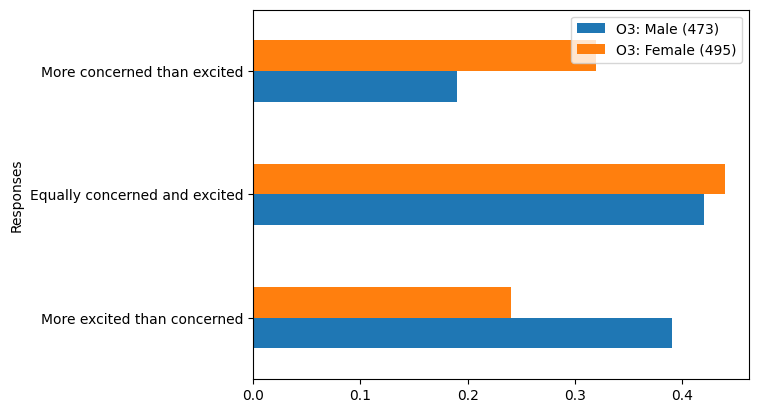

In [48]:
#choose question and segments
qid = 7
segs = [12,13]

#plot
d =plot_poll(qs[qid],segs)

#Visusalize collective response question data

Here we create a simple visualization of the results of a **collective response** question (aka "ask opinion" on Remesh) where users respond with natural language and then vote on the responses submitted by others. The visualization is generated for a selected *question* and *set of segments*. In the visualization each row corresponds to a response, columns correspond to the selected set of segments, and values correspond to the fraction of each segment which  agrees* with each response.

**this agreement fraction is computed on Remesh using [elicitation inference](https://openreview.net/pdf?id=tkxnRPkb_H). We sample around 10-30 votes per person, then infer the rest. Accuracy of individual vote inferences is 75-80%, and the aggregated agreement fraction values for each segment have a 1 stdv confidence range of around +/- 1-3%.*

In [44]:
#plot ask opinion data
def make_pretty(styler):
  styler.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")
  styler.format(precision=2)
  return styler

#generate the table of data
def table_ask(df,segs,n):
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[6+segs[i]])
  dfplt = df[segs_incl]
  #dfplt = dfplt.set_index('Responses')
  return dfplt.iloc[:n]



In [ ]:
#example usage

#choose question and segments
qid = 16
segs = [54,55,56,52,53,50,51,12,13,16,17,18]

#plot
print(qs[qid]["Question"][1])
table_ask(qs[qid],segs,30).style.pipe(make_pretty)

# Filter responses with agreement for a given segment above a certian threshold

In [45]:
def get_responses_over_thresh(df,seg,thresh):
  bdf = table_ask(df,seg,100000000)
  return bdf.loc[bdf[df.columns[6+seg[0]]]>thresh]

In [ ]:
#example usage

#choose question and segments
qid = 11
segs = [0]
thresh = .56

#plot
print(qs[qid]["Question"][1])
get_responses_over_thresh(qs[qid],segs,thresh).style.pipe(make_pretty)

# Distill unique ideas from filtered responses

Here we use an LLM (GPT-4):

1.   Generate a summary of the unique ideas found within the bridging responses.


In [ ]:
!pip install langchain
!pip install openai
!pip install -U sentence-transformers
import os
os.environ["OPENAI_API_KEY"] = "your_api_key"

In [49]:
#build the lang chain to do summary -> policies

#from langchain.llms import ChatOpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SequentialChain

#load LLM
llm = ChatOpenAI(temperature=0.5,model_name='gpt-4-32k')

#summarization prompt
summaryPrompt = PromptTemplate(
    input_variables=["question","responses"],
    template="""
    Participants in a research study were asked '{question}'.

    These are their responses:
    {responses}

    Distill and summarize the unique ideas within these responses into a few very short bullet points.
    """
)
#add to chain
summaryChain = LLMChain(llm=llm, prompt=summaryPrompt,output_key="summary")


#build the chain
mainChain = SequentialChain(
    chains=[summaryChain],
    input_variables=["question", "responses"],
    # Here we return multiple variables
    output_variables=["summary"],
    verbose=False)

#function to run the whole pipeline
def gen_summary(qs,qid,segs,thresh):
  #build string of responses
  ba = get_responses_over_thresh(qs[qid],segs,thresh)
  responses_str = ''
  for ind in ba.index:
    rsp = ba["Responses"][ind]
    responses_str+=rsp
    responses_str+="\n "

  #get quesiton text
  df = qs[qid]
  question_str = df["Question"][1]

  #run the langchain on the data
  out = mainChain({
      "question":question_str,
      "responses":responses_str
  })
  return out

In [ ]:
#example usage

#choose question and segments
qid = 12
segs = [60]
thresh = .5

#show question
print(qs[qid]["Question"][1])

#generate policies
out = gen_summary(qs,qid,segs,thresh)

#show results
print("Summary:")
print(out["summary"])

# Summary of most agreed on responses for why participants did or did not support the policy

In [55]:
#choose question and segments
qid = 10
segs = [61]
thresh = .57

#show question
print(qs[qid]["Question"][1])

#generate policies
out = gen_summary(qs,qid,segs,thresh)

#show results
print("Summary:")
print(out["summary"])

Branch A - Why do you support the policy?
Summary:
- The policy provides a comprehensive framework for AI interaction in various situations, particularly in medical and mental health crises.
- It prioritizes user safety by directing them to emergency services when necessary.
- It ensures transparency about the AI's limitations and clearly states it's not a substitute for professional medical advice.
- It provides reliable and trustworthy sources and can act as a triage for directing help.
- The policy is adaptable and open to updates, ensuring the AI stays relevant and secure.
- It is a quick and efficient way to provide necessary medical information, especially in emergencies.
- It helps in providing access to medical help for those who may not have immediate access to a doctor.
- It's a good source for basic medical information and directs users to additional resources.
- It can provide comfort and immediate advice to those in need, particularly during mental health crises.
- It is a

In [69]:
#choose question and segments
qid = 11
segs = [0]
thresh = .56

#show question
print(qs[qid]["Question"][1])

#generate policies
out = gen_summary(qs,qid,segs,thresh)

#show results
print("Summary:")
print(out["summary"])

Branch B - Can you share your concerns about supporting the policy?
Summary:
- AI may not be able to accurately assess and diagnose medical situations, especially emergencies.
- AI lacks empathy and human judgement, which is crucial in medical and mental health situations.
- AI may provide incorrect or misleading advice, which could lead to harmful consequences.
- There are privacy and data security concerns associated with AI.
- There is a risk of AI being manipulated to promote certain treatments or drugs.
- AI cannot replace human interaction and the expertise of medical professionals.
- There are legal and accountability issues if the AI provides harmful advice.
- AI may not be able to cater to diverse and nuanced situations, potentially leading to bias and discrimination.
- There are concerns about AI replacing jobs in the medical field.
- AI may not be reliable or accessible for all, particularly those with mental health issues or developmental disabilities.
